In [1]:
import h5py, os
import numpy as np
import matplotlib.pyplot as plt
from imp import reload
import pandas as pd

from cca import analysis
from cca import plotting
from cca import data_util
from cca import style

In [8]:
reload(data_util)
M1 = data_util.load_sabes_data('neural/indy_20160627_01.mat')

In [9]:
reload(data_util)
HC = data_util.load_kording_paper_data('neural/example_data_hc.pickle')

In [4]:
print(M1['M1'].shape)
print(HC['neural'].shape)

(67258, 109)
(27854, 55)


In [14]:
T_pi_vals = np.array([5])

m1_dims = np.arange(1, M1['M1'].shape[1]+1)
hc_dims = np.arange(1, HC['neural'].shape[1]+1)

offsets = np.array([5])

win = 3
n_cv = 5
n_init = 5

In [ ]:
reload(analysis)
reload(plotting)

M1_results = analysis.run_analysis(M1['M1'], M1['cursor'], T_pi_vals, dim_vals=m1_dims, offset_vals=offsets,
                                   num_cv_folds=n_cv, decoding_window=win, n_init=n_init, verbose=True)

HC_results = analysis.run_analysis(HC['neural'], HC['loc'], T_pi_vals, dim_vals=hc_dims, offset_vals=offsets,
                                   num_cv_folds=n_cv, decoding_window=win, n_init=n_init, verbose=True)

fold 1 of 5
dim 1 of 109
dim 2 of 109
dim 3 of 109
dim 4 of 109
dim 5 of 109
dim 6 of 109
dim 7 of 109
dim 8 of 109
dim 9 of 109
dim 10 of 109
dim 11 of 109
dim 12 of 109
dim 13 of 109
dim 14 of 109
dim 15 of 109
dim 16 of 109
dim 17 of 109
dim 18 of 109
dim 19 of 109
dim 20 of 109
dim 21 of 109
dim 22 of 109
dim 23 of 109
dim 24 of 109
dim 25 of 109
dim 26 of 109
dim 27 of 109
dim 28 of 109
dim 29 of 109
dim 30 of 109
dim 31 of 109
dim 32 of 109
dim 33 of 109
dim 34 of 109
dim 35 of 109
dim 36 of 109
dim 37 of 109
dim 38 of 109
dim 39 of 109
dim 40 of 109
dim 41 of 109
dim 42 of 109
dim 43 of 109
dim 44 of 109
dim 45 of 109
dim 46 of 109
dim 47 of 109
dim 48 of 109
dim 49 of 109
dim 50 of 109
dim 51 of 109
dim 52 of 109
dim 53 of 109
dim 54 of 109
dim 55 of 109
dim 56 of 109
dim 57 of 109
dim 58 of 109
dim 59 of 109
dim 60 of 109
dim 61 of 109
dim 62 of 109
dim 63 of 109
dim 64 of 109
dim 65 of 109
dim 66 of 109
dim 67 of 109
dim 68 of 109
dim 69 of 109
dim 70 of 109
dim 71 of 109
dim

In [ ]:
np.savez('real_data_dim_scan.npz', M1_results=M1_results, HC_results=HC_results)

In [2]:
d = np.load('real_data_dim_scan.npz')
M1_results = d['M1_results']
HC_results = d['HC_results']

In [ ]:
reload(analysis)
reload(plotting)

T_pi = 5
offset = 5

M1_results2, null_M1_results = analysis.run_dim_analysis_dca(M1['M1'], M1['cursor'], T_pi, dim_vals=m1_dims, offset=offset,
                                   num_cv_folds=n_cv, decoding_window=win, n_init=n_init, verbose=True)

HC_results2, null_HC_results = analysis.run_dim_analysis(HC['neural'], HC['loc'], T_pi, dim_vals=hc_dims, offset=offset,
                                   num_cv_folds=n_cv, decoding_window=win, n_init=n_init, verbose=True)

fold 1 of 5
dim 1 of 109
dim 2 of 109
dim 3 of 109
dim 4 of 109
dim 5 of 109


In [ ]:
np.savez('real_data_dim_scan2.npz', M1_results2=M1_results2, null_M1_results=null_M1_results,
         HC_results2=HC_results2, null_HC_results=null_HC_results)

In [6]:
d = np.load('real_data_dim_scan2.npz')
M1_results2 = d['M1_results2']
HC_results2 = d['HC_results2']
null_M1_results2 = d['null_M1_results2']
null_HC_results2 = d['null_HC_results2']

FileNotFoundError: [Errno 2] No such file or directory: 'real_data_dim_scan2.npz'

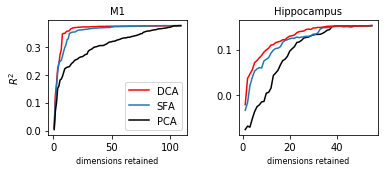

In [5]:
f, axes = plt.subplots(1, 2, figsize=(5.5, 2.5))

ax = axes[0]
ax.plot(np.arange(1, M1_results.shape[1]+1), np.squeeze(M1_results[...,2]).mean(axis=0), c='red', label='DCA')
ax.plot(np.arange(1, M1_results.shape[1]+1), np.squeeze(M1_results[...,1]).mean(axis=0), c='#1F77B4', label='SFA')
ax.plot(np.arange(1, M1_results.shape[1]+1), np.squeeze(M1_results[...,0]).mean(axis=0), c='k', label='PCA')
ax.set_ylabel(r'$R^2$')
ax.legend(loc='best')
ax.set_title('M1', fontsize=style.title_fontsize)

ax = axes[1]
ax.plot(np.arange(1, HC_results.shape[1]+1), np.squeeze(HC_results[...,0]).mean(axis=0), c='k')
ax.plot(np.arange(1, HC_results.shape[1]+1), np.squeeze(HC_results[...,1]).mean(axis=0), c='#1F77B4')
ax.plot(np.arange(1, HC_results.shape[1]+1), np.squeeze(HC_results[...,2]).mean(axis=0), c='red')
ax.set_title('Hippocampus', fontsize=style.title_fontsize)

for ax in axes:
    ax.set_xlabel('dimensions retained', fontsize=style.axis_label_fontsize)

f.tight_layout()
plt.savefig('/home/jesse/Downloads/neural_dim_scan.pdf')

In [21]:
from scipy.stats import special_ortho_group as sog

In [122]:
dim = 5
pdim = 2
V = sog.rvs(dim)[:, :pdim]
VF = np.concatenate([V, np.zeros((dim, dim-pdim))], axis=1)
VFc = np.concatenate([np.zeros((dim, pdim)), np.linalg.svd(VF)[0][:, pdim:]], axis=1)
R = VF + VFc
null_dir = VFc[:, pdim:].dot(sog.rvs(dim-pdim))[:, [-1]]
Vp = np.concatenate([V, null_dir], axis=1)

In [123]:
V

array([[ 0.53491793,  0.03604465],
       [-0.5880519 ,  0.24390549],
       [ 0.44827625, -0.38620832],
       [-0.0571465 ,  0.40440663],
       [-0.4047721 , -0.79152341]])

In [124]:
np.linalg.svd(VF)

(array([[-0.0260139 ,  0.53549947,  0.79282097, -0.14419193, -0.2514104 ],
        [-0.25488282, -0.58337781,  0.47827556, -0.35050635,  0.49305463],
        [ 0.39454125,  0.44095994, -0.01513568,  0.08587831,  0.80142833],
        [-0.40540655, -0.04955783,  0.22276765,  0.87447074,  0.13735014],
        [ 0.78379893, -0.41953426,  0.3046849 ,  0.2903099 , -0.18038159]]),
 array([1., 1., 0., 0., 0.]),
 array([[ 0.01874012, -0.99982439, -0.        , -0.        , -0.        ],
        [ 0.99982439,  0.01874012,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ]]))

In [125]:
R.dot(R.T)

array([[ 1.00000000e+00,  8.51795462e-17, -1.51071728e-16,
        -1.30620917e-17,  6.20596505e-17],
       [ 8.51795462e-17,  1.00000000e+00,  1.39239919e-16,
         4.05610772e-17, -1.92178112e-16],
       [-1.51071728e-16,  1.39239919e-16,  1.00000000e+00,
        -7.06663236e-17,  2.07149714e-16],
       [-1.30620917e-17,  4.05610772e-17, -7.06663236e-17,
         1.00000000e+00, -1.29196939e-16],
       [ 6.20596505e-17, -1.92178112e-16,  2.07149714e-16,
        -1.29196939e-16,  1.00000000e+00]])

In [126]:
VF

array([[ 0.53491793,  0.03604465,  0.        ,  0.        ,  0.        ],
       [-0.5880519 ,  0.24390549,  0.        ,  0.        ,  0.        ],
       [ 0.44827625, -0.38620832,  0.        ,  0.        ,  0.        ],
       [-0.0571465 ,  0.40440663,  0.        ,  0.        ,  0.        ],
       [-0.4047721 , -0.79152341,  0.        ,  0.        ,  0.        ]])

In [127]:
VFc

array([[ 0.        ,  0.        ,  0.79282097, -0.14419193, -0.2514104 ],
       [ 0.        ,  0.        ,  0.47827556, -0.35050635,  0.49305463],
       [ 0.        ,  0.        , -0.01513568,  0.08587831,  0.80142833],
       [ 0.        ,  0.        ,  0.22276765,  0.87447074,  0.13735014],
       [ 0.        ,  0.        ,  0.3046849 ,  0.2903099 , -0.18038159]])

In [128]:
np.linalg.svd(VFc + VF)[1]

array([1., 1., 1., 1., 1.])

In [129]:
Vp

array([[ 0.53491793,  0.03604465, -0.60696826],
       [-0.5880519 ,  0.24390549, -0.42534922],
       [ 0.44827625, -0.38620832, -0.20618669],
       [-0.0571465 ,  0.40440663, -0.54350442],
       [-0.4047721 , -0.79152341, -0.33579392]])

In [130]:
Vp.T.dot(Vp)

array([[ 1.00000000e+00, -2.05800841e-17, -5.92718980e-17],
       [-2.05800841e-17,  1.00000000e+00, -3.89792997e-18],
       [-5.92718980e-17, -3.89792997e-18,  1.00000000e+00]])

In [131]:
sog.rvs?